# Неделя 4: ЦПТ

## Критерии

Решение должно представлять собой IPython-ноутбук, содержащий:

+код, генерирующий выборки и графики; 
+краткие описания каждого блока кода, объясняющие, что он делает;  
+необходимые графики (убедитесь, что на них подписаны оси);  
+выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;  
+выводы по результатам выполнения задания.

Библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import *
%matplotlib inline

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).  

Распределение: нецентральное t  
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.nct.html#scipy.stats.nct  
Параметры: df = 5, nc = 0.75, loc = 0, scale = 1

In [2]:
dfr = 5
nc = .5
t_rv = sts.nct(dfr, nc)

Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

In [3]:
np.random.seed(seed=1)
sample = t_rv.rvs(1000)
sample[0:5]

array([ 2.4060597 , -0.22500758, -0.04208128, -0.51429396,  0.94234711])

Text(0.5,1,'Нецентральное t')

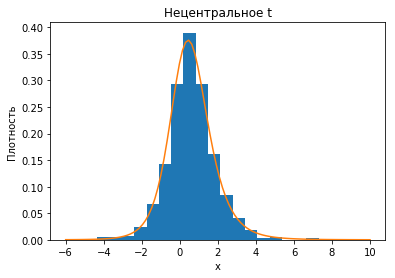

In [4]:
plt.hist(sample, bins=20, normed=True)
# Теоретическая плотность:
x = np.linspace(-6,10,100)
pdf = t_rv.pdf(x)
plt.plot(x, pdf)
plt.ylabel('Плотность')
plt.xlabel('x')
plt.title("Нецентральное t")

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок.
Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних.

In [5]:
ns = [5, 10, 50]
def lmap(function, vals):
    return list(map(function, vals))

In [6]:
samples = [[t_rv.rvs(n) for i in range(1000)] for n in ns] 

In [7]:
lmap(len,samples)

[1000, 1000, 1000]

In [8]:
samples[0][0:10]

[array([ 1.18560575,  0.63666071,  0.42219802,  0.23826165,  0.76921401]),
 array([ 2.19706593,  0.60215652,  0.53722973, -0.09117683,  0.47116043]),
 array([ 0.80838292, -0.09406214,  0.60712398, -1.93880849,  1.08085662]),
 array([-0.2208814 ,  0.76419951,  1.03947512,  0.62375104, -0.09668429]),
 array([-0.12027085,  1.19948515,  1.46725938, -0.49560039,  3.59371865]),
 array([ 0.28427258, -0.41107707,  0.1730944 ,  1.38682581,  0.14772182]),
 array([ 0.03783909,  1.43865422, -0.19354089,  0.61127135, -0.66399406]),
 array([ 1.75717228,  0.40657518, -0.08951443,  0.1315126 , -0.85675506]),
 array([-1.28725879,  1.08067881, -0.96777396, -0.56134481,  2.4461474 ]),
 array([-0.231725  , -0.15502814,  0.73389676,  1.58689554,  1.01120206])]

In [9]:
means = [[np.mean(samples[i][j]) for j in range(1000)] for i in range(len(ns))]

In [10]:
means[0][0:10]

[0.65038802676388807,
 0.74328715442027049,
 0.092698577850216693,
 0.42197199655820511,
 1.1289183887612637,
 0.31616750810189748,
 0.24604594155594603,
 0.26979811334814868,
 0.14208973011187331,
 0.58904824366065234]

Text(0.5,1,'Гистограммы средних\n для разных длин выборок')

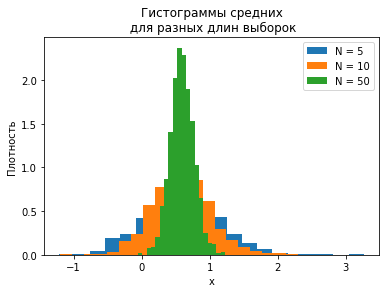

In [11]:
for i in range(len(ns)):
    plt.hist(means[i], bins=20, label = 'N = ' + str(ns[i]), normed=True)
plt.legend()
plt.ylabel('Плотность')
plt.xlabel('x')
plt.title("Гистограммы средних\n для разных длин выборок")

Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.  
Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. 

Для определения среднего и дисперсии воспользуемся заданным объектом распределения (не википедией)

In [12]:
t_rv.mean(), t_rv.var()

(0.59470803871759048, 1.7296556820180102)

In [18]:
sqrt_ns = lmap(sqrt,ns)

In [19]:
variances = t_rv.var() / sqrt_ns
variances

array([ 0.77352554,  0.54696515,  0.24461025])

Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).  

In [20]:
norm_mean = t_rv.mean()
norm_var = variances

Text(0.5,1,'Гистограммы средних\n c наложением нормальных распределений')

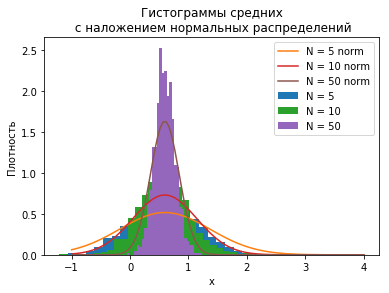

In [21]:
for i in range(len(ns)):
    x = np.linspace(-1,4,100)
    n_rv = sts.norm(norm_mean, norm_var[i])
    pdf = n_rv.pdf(x)
    plt.hist(means[i], bins=30, label = 'N = ' + str(ns[i]), normed=True)
    plt.plot(x, pdf, label = 'N = ' + str(ns[i]) + ' norm')
plt.legend()
plt.ylabel('Плотность')
plt.xlabel('x')
plt.title("Гистограммы средних\n c наложением нормальных распределений")

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

=> Дисперсия с ростом N ниже => растет точность приближения выборочных средних нормальным .